<a href="https://colab.research.google.com/github/jamespradhan/cache-simulation/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load results
df = pd.read_csv("cache_comparison_trace4.csv")

# Convert relevant columns to numeric just in case
df["Total Cycles"] = pd.to_numeric(df["Total Cycles"], errors="coerce")
df["L1 Hit Rate (%)"] = pd.to_numeric(df["L1 Hit Rate (%)"], errors="coerce")

# Drop any rows with missing values in these columns
df_clean = df.dropna(subset=["Total Cycles", "L1 Hit Rate (%)"])

# Sort by: 1) Lowest total cycles, 2) Highest L1 hit rate, 3) Mode preference (Multi over Single)
df_sorted = df_clean.sort_values(
    by=["Total Cycles", "L1 Hit Rate (%)", "Mode"],
    ascending=[True, False, True]  # Multi comes before Single alphabetically
)

# Show the best one
best_config = df_sorted.iloc[0]
print("🏆 Best Cache Configuration:")
print(best_config)

🏆 Best Cache Configuration:
Mode                      Multi
L1 Size                    1024
L2 Size                    4096
Block Size                   64
Associativity                 4
Policy                      LRU
L1 Hits                 5326020
L1 Misses                491474
L2 Hits                  304790
L2 Misses                186684
Memory Accesses          186684
Total Accesses          5817494
L1 Hit Rate (%)           91.55
L2 Hit Rate (%)           62.02
Total Cycles           16184170
Total Hit Rate (%)    91.551792
Name: 67, dtype: object


In [2]:
df_sorted.head(5)

,Mode,L1 Size,L2 Size,Block Size,Associativity,Policy,L1 Hits,L1 Misses,L2 Hits,L2 Misses,Memory Accesses,Total Accesses,L1 Hit Rate (%),L2 Hit Rate (%),Total Cycles,Total Hit Rate (%)
67,Multi,1024,4096,64,4,LRU,5326020,491474,304790,186684,186684,5817494,91.55,62.02,16184170,91.551792
69,Multi,1024,4096,64,4,Random,5205031,612463,408595,203868,203868,5817494,89.47,66.71,17441406,89.472048
63,Multi,1024,4096,64,2,Random,5172520,644974,434036,210938,210938,5817494,88.91,67.3,17889600,88.913199
61,Multi,1024,4096,64,2,LRU,4569549,1247945,1063375,184570,184570,5817494,78.55,85.21,19114924,78.548409
71,Multi,1024,4096,64,4,FIFO,4858872,958622,735674,222948,222948,5817494,83.52,76.74,19684642,83.521736


In [3]:
df_sorted.shape

(72, 16)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

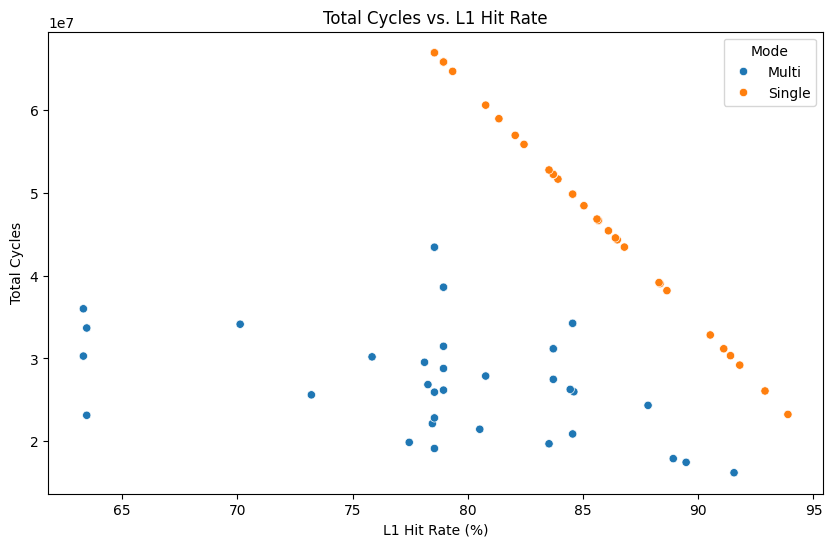

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Total Hit Rate (%)", y="Total Cycles", hue="Mode", data=df_sorted)
plt.title("Total Cycles vs. L1 Hit Rate")
plt.xlabel("L1 Hit Rate (%)")
plt.ylabel("Total Cycles")
plt.show()

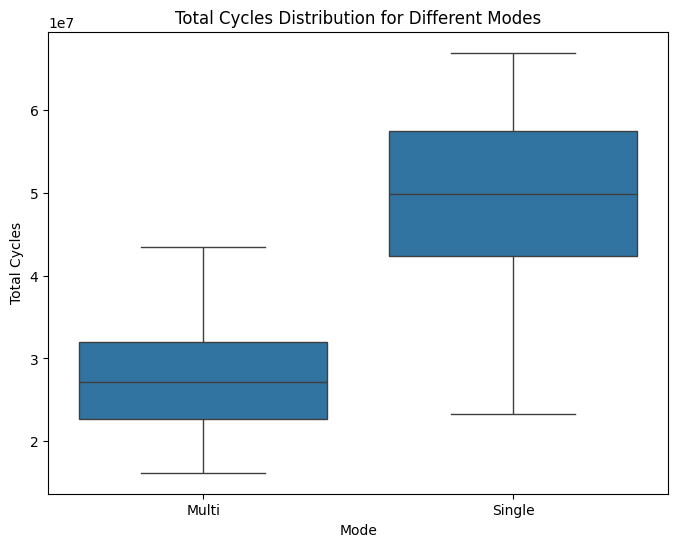

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Mode", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Modes")
plt.xlabel("Mode")
plt.ylabel("Total Cycles")
plt.show()

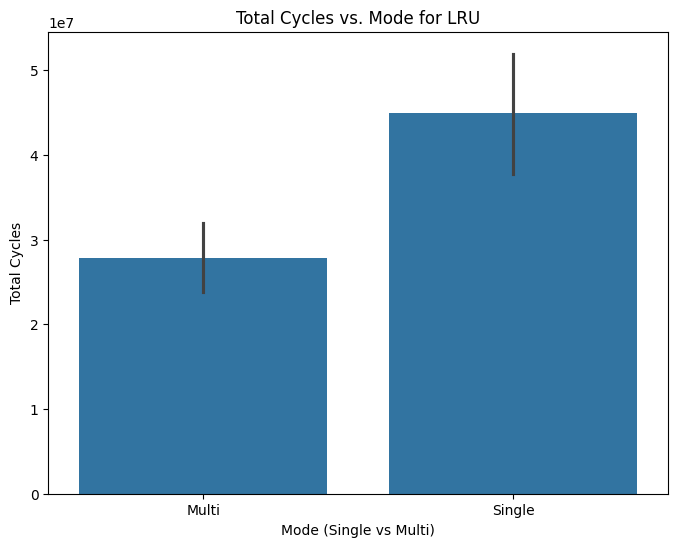

In [8]:
lru_data = df_sorted[df_sorted['Policy'] == 'LRU']

plt.figure(figsize=(8, 6))
sns.barplot(x='Mode', y='Total Cycles', data=lru_data)
plt.title('Total Cycles vs. Mode for LRU')
plt.xlabel('Mode (Single vs Multi)')
plt.ylabel('Total Cycles')
plt.show()

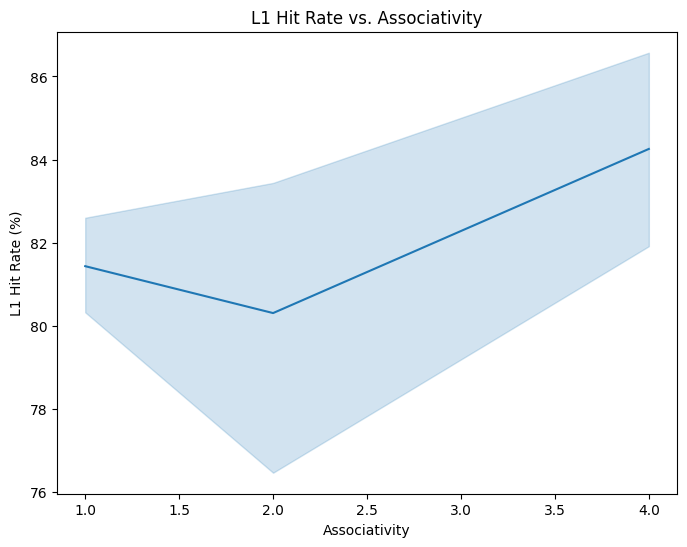

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Associativity', y='L1 Hit Rate (%)', data=df_sorted)
plt.title('L1 Hit Rate vs. Associativity')
plt.xlabel('Associativity')
plt.ylabel('L1 Hit Rate (%)')
plt.show()

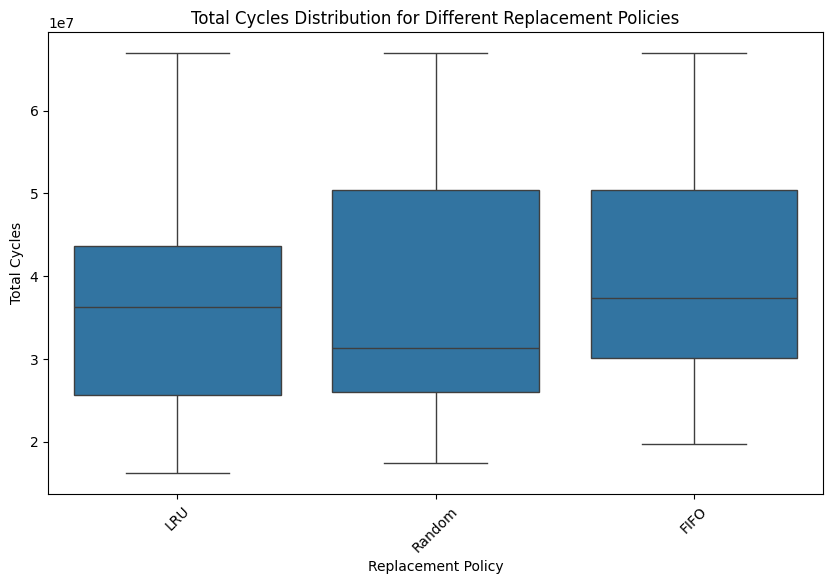

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Policy", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Total Cycles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

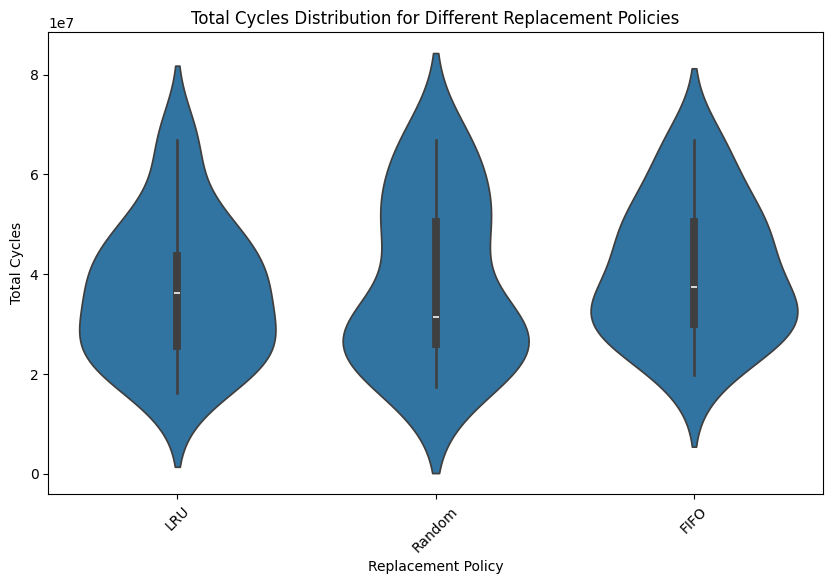

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Policy", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Total Cycles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

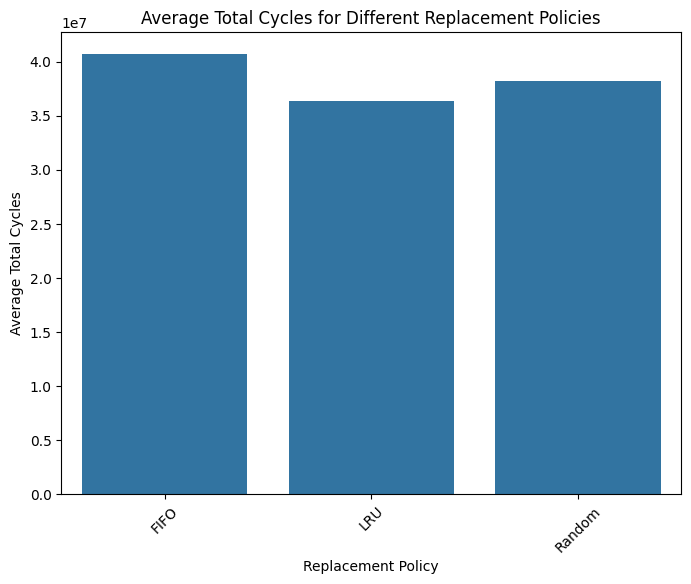

In [12]:
avg_cycles = df_sorted.groupby("Policy")["Total Cycles"].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x="Policy", y="Total Cycles", data=avg_cycles)
plt.title("Average Total Cycles for Different Replacement Policies")
plt.xlabel("Replacement Policy")
plt.ylabel("Average Total Cycles")
plt.xticks(rotation=45) 
plt.show()

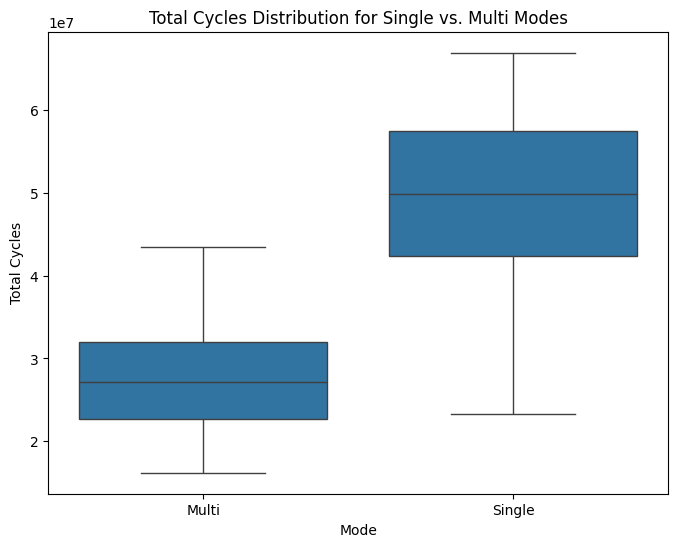

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Mode", y="Total Cycles", data=df_sorted)
plt.title("Total Cycles Distribution for Single vs. Multi Modes")
plt.xlabel("Mode")
plt.ylabel("Total Cycles")
plt.show()

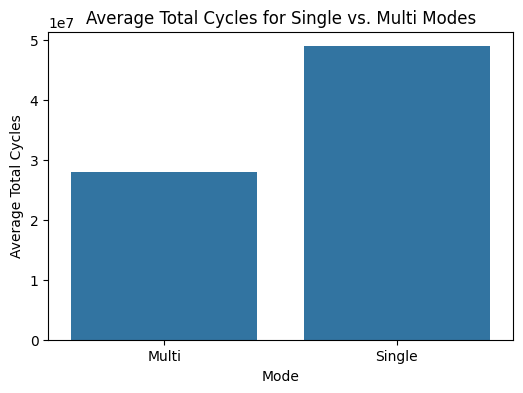

In [14]:
avg_cycles = df_sorted.groupby("Mode")["Total Cycles"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="Mode", y="Total Cycles", data=avg_cycles)
plt.title("Average Total Cycles for Single vs. Multi Modes")
plt.xlabel("Mode")
plt.ylabel("Average Total Cycles")
plt.show()

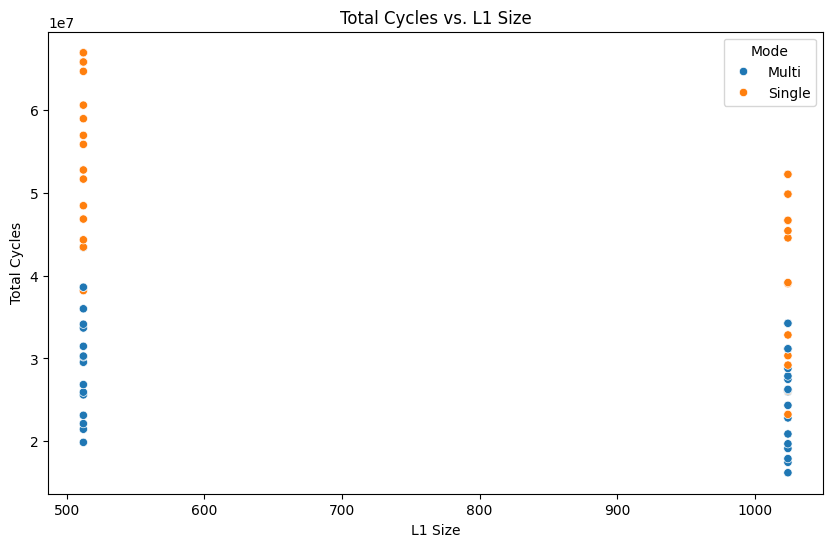

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='L1 Size', y='Total Cycles', hue='Mode', data=df_sorted)
plt.title('Total Cycles vs. L1 Size')
plt.xlabel('L1 Size')
plt.ylabel('Total Cycles')
plt.show()

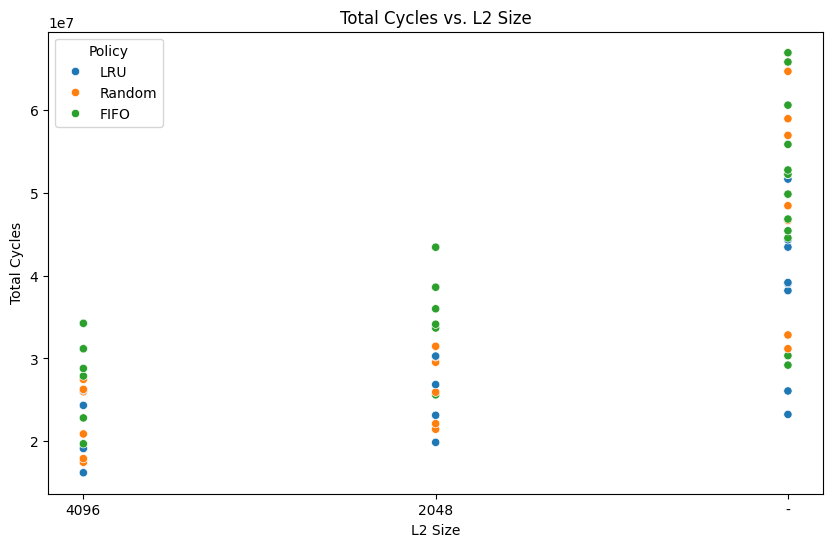

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='L2 Size', y='Total Cycles', hue='Policy', data=df_sorted)  # You can change 'hue' to 'Mode' if you prefer
plt.title('Total Cycles vs. L2 Size')
plt.xlabel('L2 Size')
plt.ylabel('Total Cycles')
plt.show()